# Predicting Sales Prices

 ## Dataset Attributes

 The dataset contains information about houses in Ames, Iowa. The data was collected by the Ames City Assessor’s Office describing 2930 property sales which occurred in Ames, Iowa between 2006 and 2010. The dataset, containing 81 variables, was compiled and published by De Cock in 2011.

 Some of the variables contained in the original dataset have been removed from the the dataset provided to you.
 The dataset provided to you contains the following variables:
* **Year_Built:** year that the house was originally constructed
* **Year_Remod_Add:** year that the house was last remodelled
* **Total_Bsmt_SF:** total size of basement area in square feet
* **First_Flr_SF:** size of the first floor in square feet
* **Second_Flr_SF:** size of the second floor in square feet
* **Gr_Liv_Area:** size of above grade, ground living area in square feet
* **Full_Bath:** number of full above grade bathrooms in the house
* **Half_Bath:** number of half above grade bathrooms in the house
* **Bedroom_AbvGr:** number of above grade bedrooms (does not include basement bedrooms)
* **Kitchen_AbvGr:** number of above grade kitchens
* **TotRms_AbvGrd:** total number of above grade rooms (does not include bathrooms)
* **Fireplaces:** number of fireplaces in the house
* **Garage_Area:** size of garage in square feet
* **Sale_Price:** sale price of the house in dollars


*De Cock, D. (2011). "Ames, Iowa: Alternative to the Boston Housing Data as an End of Semester
Regression Project," Journal of Statistics Education, Volume 19, Number 3.*

- https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt
- http://ww2.amstat.org/publications/jse/v19n3/decock.pdf


 ## Objective

 The goal of this task is to analyse the relationship between these variables and build a multiple linear regression model to predict the sales prices based on the 'Gr_Liv_Area' and 'Garage_Area` variables.


In [113]:
# Import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [114]:
# Read in the data set
ames_df = pd.read_csv("ames.csv")

In [115]:
# View snpshot of the data
print(ames_df.head())

   Year_Built  Year_Remod_Add  Total_Bsmt_SF  First_Flr_SF  Second_Flr_SF  \
0        1960            1960           1080          1656              0   
1        1961            1961            882           896              0   
2        1958            1958           1329          1329              0   
3        1968            1968           2110          2110              0   
4        1997            1998            928           928            701   

   Gr_Liv_Area  Full_Bath  Half_Bath  Bedroom_AbvGr  Kitchen_AbvGr  \
0         1656          1          0              3              1   
1          896          1          0              2              1   
2         1329          1          1              3              1   
3         2110          2          1              3              1   
4         1629          2          1              3              1   

   TotRms_AbvGrd  Fireplaces  Garage_Area  Sale_Price  
0              7           2          528      215000  
1   

In [116]:
# Clean and pre-process the data if neccessary
# Handle missing values
ames_df = ames_df.fillna(0) 

# Create new columns
ames_df['Total_SF'] = ames_df['Total_Bsmt_SF'] + ames_df['First_Flr_SF'] + ames_df['Second_Flr_SF']
ames_df['Bathrooms'] = ames_df['Full_Bath'] + 0.5 * ames_df['Half_Bath']

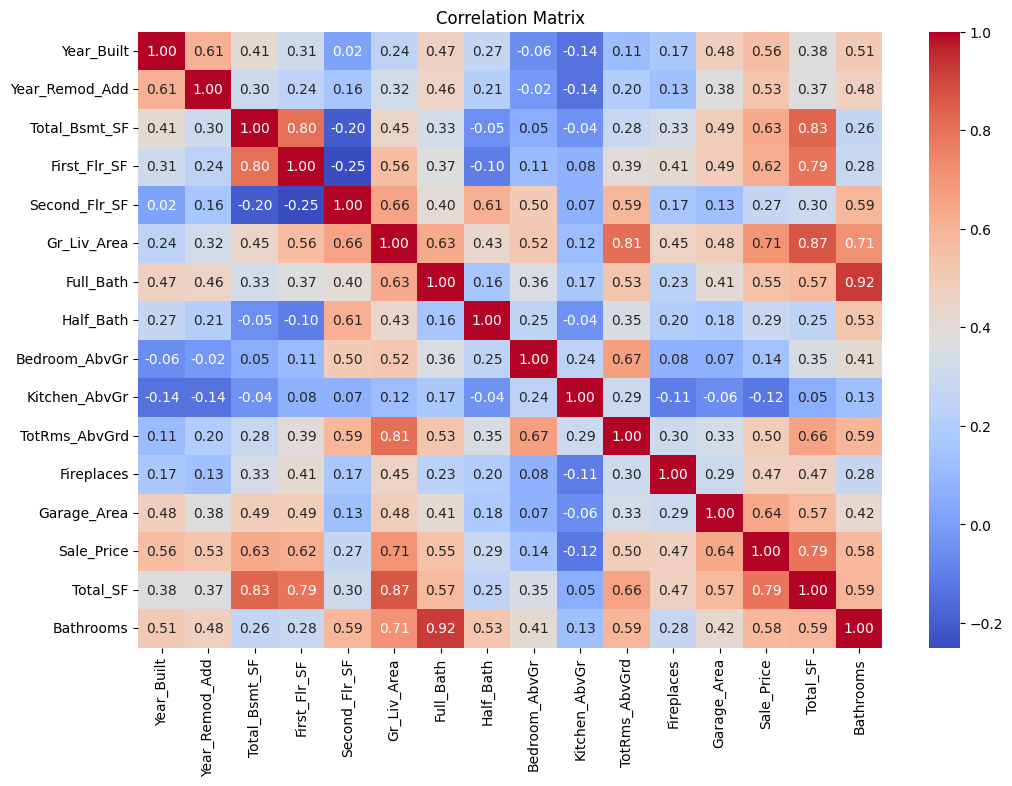

In [117]:
# Explore the data with visualisations
# Display correlation matrix
plt.figure(figsize=(12, 8))
corr = ames_df.corr(numeric_only=True)  
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

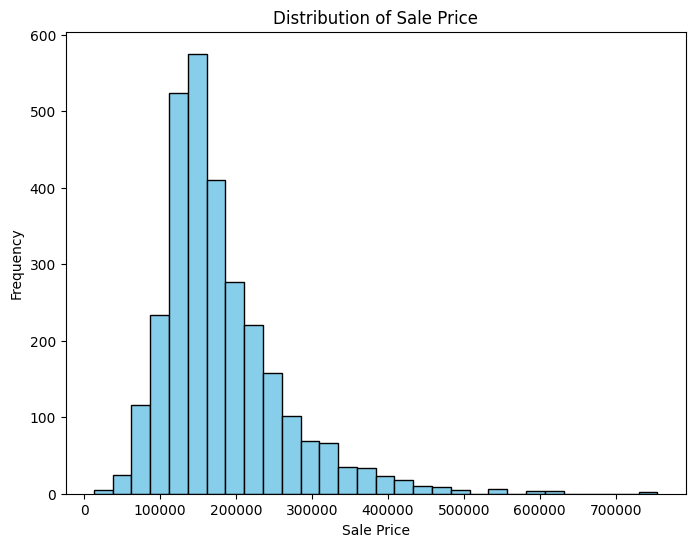

In [118]:
# Histogram for sale price shows that the majority of houses sale price are between $100000 and $200000
plt.figure(figsize=(8, 6))
plt.hist(ames_df['Sale_Price'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Distribution of Sale Price')
plt.show()

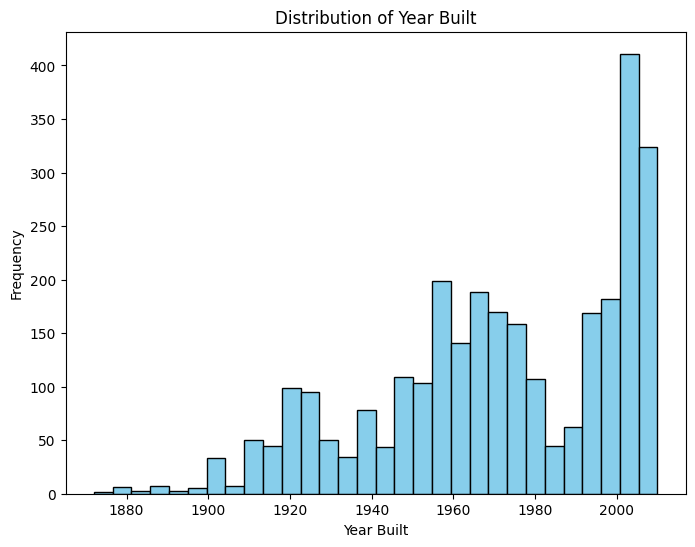

In [119]:
# Histogram for year built shows a general upward trend (indicating that as time went on more houses were built)
plt.figure(figsize=(8, 6))
plt.hist(ames_df['Year_Built'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Year Built')
plt.ylabel('Frequency')
plt.title('Distribution of Year Built')
plt.show()

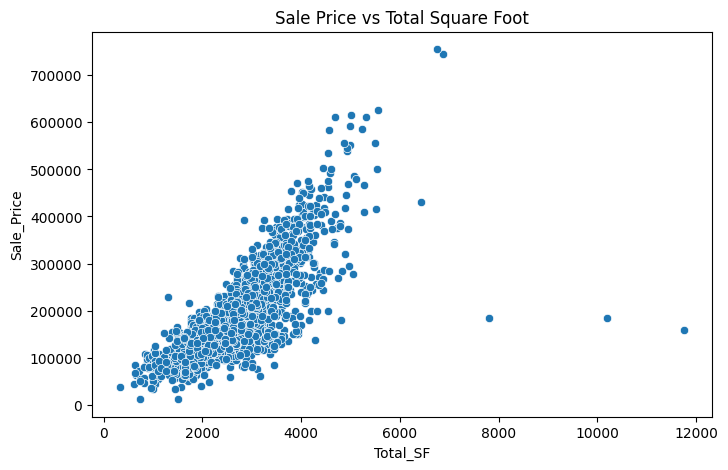

In [120]:
# Scatter plot for sale price vs total square foot shows a general upward trend (more square foot likely means a higher sale price)
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Total_SF", y="Sale_Price", data=ames_df)
plt.title("Sale Price vs Total Square Foot")
plt.show()

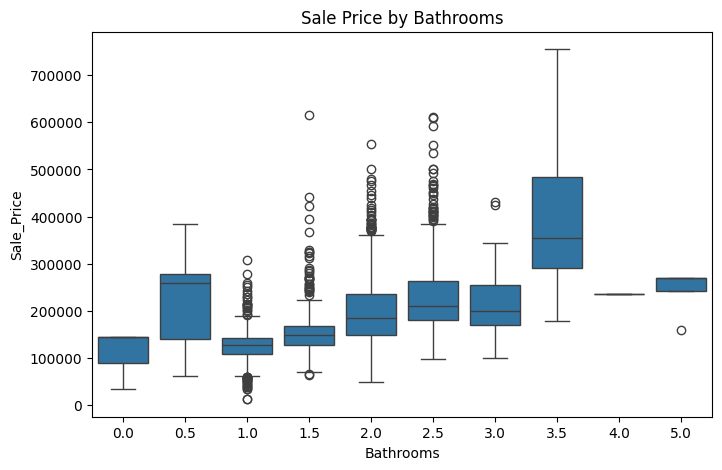

In [121]:
# Boxplot of sale price vs total bathrooms shows unclear trend - likely meaning that total bathrooms don't impact sale price significantly
plt.figure(figsize=(8, 5))
sns.boxplot(x="Bathrooms", y="Sale_Price", data=ames_df)
plt.title("Sale Price by Bathrooms")
plt.show()

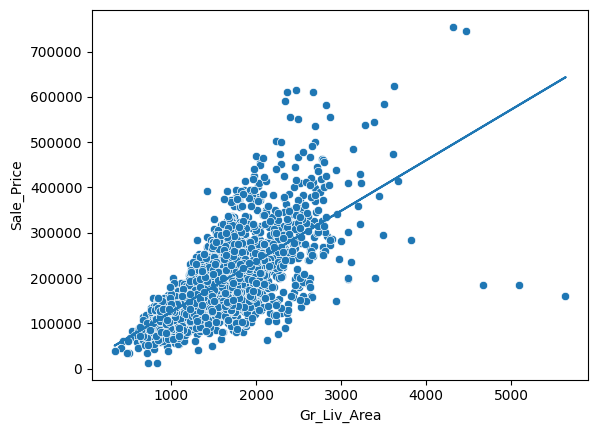

In [122]:
# Explore relationships between the independent and dependent variables

# Reshape size of above grade, ground living area in square feet into a 2D array for model inputs
X = ames_df[['Gr_Liv_Area']].values.reshape(-1,1)

# Extract sale price as the target variable
y = ames_df[['Sale_Price']].values

# Fit linear regression model to data
model = LinearRegression()
model.fit(X, y)

# Predict target values based on input data
y_pred = model.predict(X)

# Create a new figure for plotting
plt.figure()

# Plot the scatter plot of the original data
sns.scatterplot(data=ames_df, x='Gr_Liv_Area', y='Sale_Price')

# Plot the linear regression line based on the predictions
plt.plot(X, y_pred)

# Display and close the plot
plt.show()
plt.close()

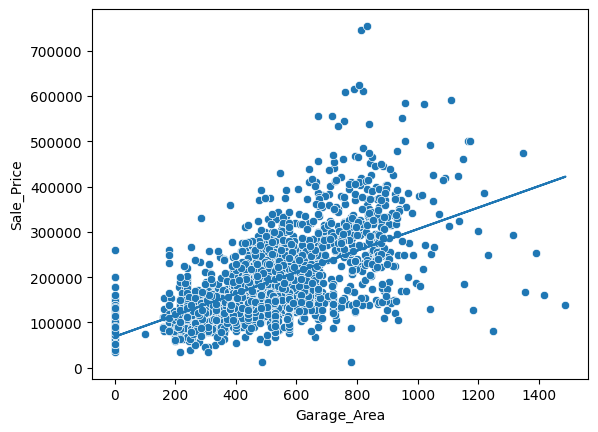

In [123]:
# Explore relationships between the independent and dependent variables

# Reshape size of garage area into a 2D array for model inputs
X = ames_df[['Garage_Area']].values.reshape(-1,1)

# Extract sale price as the target variable
y = ames_df[['Sale_Price']].values

# Fit linear regression model to data
model = LinearRegression()
model.fit(X, y)

# Predict target values based on input data
y_pred = model.predict(X)

# Create a new figure for plotting
plt.figure()

# Plot the scatter plot of the original data
sns.scatterplot(data=ames_df, x='Garage_Area', y='Sale_Price')

# Plot the linear regression line based on the predictions
plt.plot(X, y_pred)

# Display and close the plot
plt.show()
plt.close()

In [124]:
# Both of the graphs above show a general positive linear relationship between the independent variables (Gr_Liv_Area and Garage_Area) with the dependent variable (Sale_Price)

In [125]:
# Split the independent variables from the dependent variable
X = ames_df[['Gr_Liv_Area','Garage_Area']]
y = ames_df['Sale_Price']

In [126]:
# Create a training and test set with a 75:25 split ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [127]:
# Build a multiple linear regression model using 'Gr_Liv_Area' and 'Garage_Area'
# Fit regression model
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [128]:
# Print the model intercept and coefficients
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})
print("Intercept: ", model.intercept_)
print("Coefficients:")
print(coef_df)

Intercept:  -8557.449125268497
Coefficients:
       Feature  Coefficient
0  Gr_Liv_Area    79.048062
1  Garage_Area   149.962150


In [129]:
# Generate predictions for the test set
y_pred = model.predict(X_test)

In [130]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R² score on test set:", r2)

MSE: 2450814353.9744678
RMSE: 49505.70021698984
R² score on test set: 0.6275895460059242


In [ ]:
# The Mean Squared Error is pretty large because the target variable is sale price for house which is thousands of dollars.
# Looking at the Root Mean Squared Error shows that the predictions are on average $49505 off the true sale price.
# However, the R² score indicates that the model explains 62,76% of the variance in house prices. 
# The model isn't perfect and could be improved by adding more variables that impact sale price.

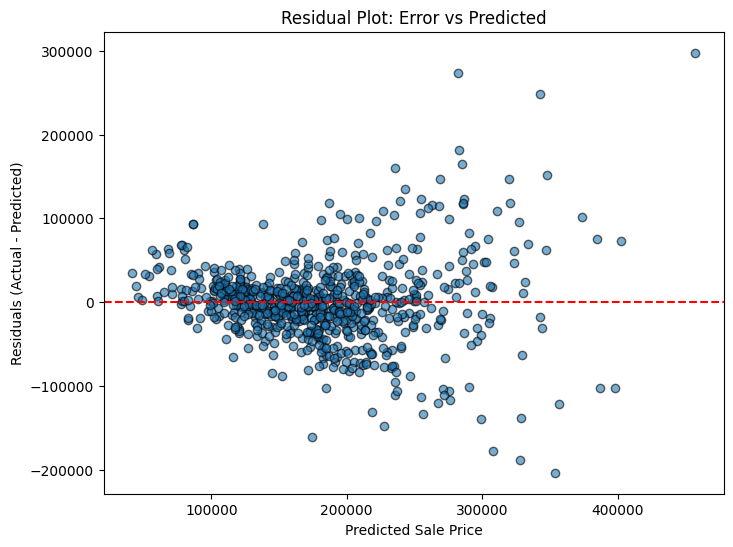

In [131]:
# The error plot indicates that between the sale price of $100000 and $200000 there is a smaller difference between predicted and actual, however as price increases so does the error

# Calculate residuals
residuals = y_test - y_pred

# Display plot
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, alpha=0.6, edgecolor="k")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Sale Price")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot: Error vs Predicted")
plt.show()

In [132]:
# Print the coefficients
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})
print(coef_df)

       Feature  Coefficient
0  Gr_Liv_Area    79.048062
1  Garage_Area   149.962150


**Interpret coefficients in the context of the prediction:**
[When Gr_Liv_Area increases by 1 square foot, the median predicted sale price increases by $79.05.] 

[When Garage_Area increases by 1 square foot, the median predicted sale price increases by $149.96.]

**Summarise findings**
[As mentioned previously, the R² score indicates that the model explains 62.76% of the variance in house prices. The model isn't perfect and could be improved by adding more variables like when the house was built, when it was last remodelled and the size of specific rooms like the kitchen, that could impact sale price.]